# Phân tích EDA dữ liệu hotel booking

## Phân tích ý nghĩa và tính chất của bảng dữ liệu
Trước khi đi vào phân tích, cần biết bảng lưu trữ gì và mỗi bản ghi đại diện cho cái gì. Theo như dữ liệu trong file excel, em thấy mỗi bản ghi đại diện cho **một booking của khách sạn**

Ý nghĩa của các cột dữ liệu trong bảng:
- **hotel**: tên khách sạn mà khách hàng đặt booking
- **is_canceled**: booking có bị cancel không
- **leadtime**: số ngày từ khi booking đến lúc khách dự kiến đến nhận phòng
- **arrival_date_year/week_number/day_of_month/**: năm/tuần/ngày mà khách hàng dự kiến đến nhận phòng
- **stays_in_weekend_nights**: số ngày cuối tuần mà khách hàng dự kiến ở (thứ 7 và chủ nhật)
- **stays_in_week_nights**: số ngày thường mà khách hàng ở (từ thứ 2 đến thứ 6)
- **number of adults/children/babies**: số người lớn/trẻ em/trẻ sơ sinh
- **meal**: loại meal mà khách hàng đặt (BB: bữa sáng, HB: bữa sáng và một bữa nữa trong ngày, FB: bữa sáng, bữa trưa và bữa tối, SC: khách hàng tự nấu bữa ăn ở bếp của khách sạn)
- **country**: quốc tịch khách hàng
- **market**: nguồn khách hàng đến từ market nào
    - TA (travel agent): từ các đại lý kinh doanh dịch vụ du lịch
    - TO (touring operator): từ các công ty tổ chức tour du lịch
    - Direct: khách hàng liên hệ trực tiếp với hotel
    - Corporate: khách hàng doanh nghiệp
    - Complementary: khàng hàng được tặng free booking
    - Groups: khách hàng đi theo nhóm
    - Aviation: từ các hãng hàng không
- **distribution_channel**: kênh phân phối
    - Direct: trực tiếp
    - Corporate: doanh nghiệp
    - TA/TO: từ đại lý hoặc công ty tổ chức tour du lịch
- **is_repeated_guest**: có phải khách hàng cũ không ? 
- **previous_cancellations**: số lượng booking mà khách hàng đã cancel từ trước đó
- **previous_bookings_not_canceled**: số lượng booking trước đó mà không bị cancel
- **reserved_room_type**: mã loại phòng mà khách hàng đặt
- **assigned_room_type**: mã loại phòng thực tế trong booking
- **booking_changes**: số lần khách hàng thay đổi booking
- **deposit types**: loại đặt cọc
    - No deposit: không có đặt cọc
    - No refund: đặt cọc bằng với chi phí tiền phòng
    - Refundable: đặt cọc với giá trị ít hơn tiền phòng
- **agent/company**: ID của agent/company đặt booking
- **customer type**
    - Contract: booking có liên quan đến một contract nào đó (thường do bên công ty hoặc đại lý kí riêng vs khách sạn)
    - Group: booking thuộc một nhóm booking nào đó
    - Transient: booking không thuộc group hoặc contract, có thể đến từ khách hàng book trực tiếp với khách sạn
    - Transient party: booking không group hoặc contract nhưng được nhóm với nhau
- **adr**: chi phí trung bình mỗi ngày mà khách ở
- **required_car_parking_spaces**: số lượng chỗ đỗ xe khách hàng cần
- **total_of_special_requests**: Số lượng special request của khách hàng
- **reservation_status**: tình trạng booking
    - Canceled: Đã cancel
    - Checkout: khách hàng đã check in và check out
    - No show: khách hàng đặt nhưng không xuất hiện để check in
- **reservation_status_date**: ngày cuối cùng status được sửa đổi. Có thể hiểu là ngày khách hàng cancel hoặc ngày check out.



In [26]:
# import thư viện
import pandas as pd 
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns


# read dữ liệu từ file excel và preview dữ liệu
df = pd.read_csv('C:/Users/admin/Downloads/GSMDARecruitingChallenge/GSMDARecruitingChallenge/hotel_bookings.csv')

#Convert cột reservationdate thành date
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


## Thực hiện EDA trên tập dữ liệu
Phân tích EDA sẽ bao gồm các phần chính sau:
- Mô tả dữ liệu các cột cơ bản
- Vẽ ma trận tương quan giữa các tính chất
- Vẽ các biểu đồ cơ bản giữa một số cột category
- Nhân biết các giá trị outlier
- Tổng hợp lại một số kết luận

### Mô tả dữ liệu các cột cơ bản
Qua việc áp dụng các hàm sum, min, max, avg vào các cột number trong bảng dữ liệu ta có thể rút ra được các kết luận sơ bộ như sau về dữ liệu:
- Trung bình thời gian khách hàng booking trước **104 ngày** thời điểm nhận phòng, đây có thể là dấu hiện cho thấy thấy khách sạn luôn ở trong tình trạng quá tải
- Tổng số lượng booking trong 4 năm từ 2014 đến 2017 là **119390**. Trong đó:
    - Số lượng booking bị cancel là 44224 (**chiếm 37,04%**, khá cao)
    - Số lượng booking đến từ khách hàng cũ là 3810 (**chiếm 3,19%**)
- Số ngày trung bình từ lúc khách hàng booking đến lúc confirm là **2 ngày** (khá cao)
- Chi phí mỗi đêm trung bình trên một booking là **101$**
- Thời gian ở của khách hàng thường **3-4 ngày** (2.5, trung bình của stays_in_week_nights, 0.93 với weekend). Và khả năng cao sẽ có 1 ngày rơi vào T7 hoặc CN
- Qua số liệu thống kê, booking thường là cho **2 người lớn**. Có thể phỏng đoán khách hàng chủ yếu là khách lẻ, cặp đôi hoặc vợ chồng. Cân nhắc tập trung phân khúc vào phòng đôi

In [22]:
numeric_column_filter = ['lead_time', 'is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
    'total_of_special_requests']

#Describe dữ liệu cơ bản
df[numeric_column_filter].agg(['sum', 'min', 'max', 'mean', 'count']).round(2)

,lead_time,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
sum,12417923.00,44224.00,110746.00,298511.0,221636.00,12403.0,949.00,3810.00,10401.00,16368.00,277122.00,12157617.60,7464.00,68215.00
min,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-6.38,0.00,0.00
max,737.00,1.00,19.00,50.0,55.00,10.0,10.00,1.00,26.00,72.00,391.00,5400.00,8.00,5.00
mean,104.01,0.37,0.93,2.5,1.86,0.1,0.01,0.03,0.09,0.14,2.32,101.83,0.06,0.57
count,119390.00,119390.00,119390.00,119390.0,119390.00,119386.0,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00


### Vẽ ma trận tương quan giữa các cột
Có thể thấy phần lớn các cột không có tính tương quan nhiều với nhau ngoại trừ các cột:
- **Stay_in_weekend_nights** và **Stay_in_week_nights** có tính tương quan cao, một lần nữa khẳng định khách hàng thường booking cho những dịp cuối tuần
- **Repeated_guest** và **previous_book_not_canceled** có tính tương quan tương đối, chứng minh số lượng book không bị cancel của khách có liên quan đến việc khách hàng có quay lại hay không => Có thể phần lớn lí do khách cancel không đến từ bản than khách
- **children** và **adr** có tính tương quan tương đối. Có thể việc có trẻ em sẽ có cơ hội làm tăng chi tiêu của khách hàng cao hơn việc có thêm người lớn

<Axes: >

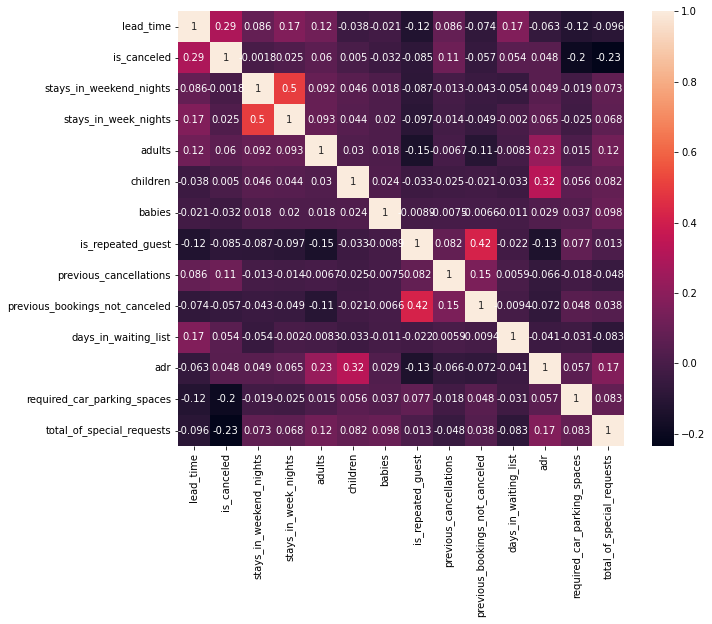

In [28]:
f, ax = plt.subplots(figsize=(10,8))

corr = df[numeric_column_filter].corr()
sns.heatmap(corr,
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### So sánh các dữ liệu category
Sau khi vẽ so sánh các category ta có thể đi đến các kết luận tổng thể như sau:
- Chủ yếu nguồn khách hàng của khách sạn đến từ các **kênh đại lý và công ty tổ chức du lịch**, rất ít đến từ việc khách hàng liên hệ trực tiếp
- Tuy là thế nhưng phần lớn các khách này lại **loại Transient** và không thuộc contract nào. Cân nhắc kí contract với các TA/TO để có thể tối ưu được lợi nhuận
- Booking của khách hàng thường chỉ **cover bữa sáng và không có đặt cọc**. Có thể cân nhắc bỏ bữa tối, và bữa trưa ở khách sạn để tiết kiệm chi phí vận hành
- Lượng booking của "City hotel gấp đôi Resort hotel", booking tăng trưởng mạnh qua các năm (năm 2017 giảm là do dữ liệu **mới đến tháng 9**)
- Lượng booking canceled cao một lần nữa được khẳng định ở biểu đồ

<Axes: xlabel='market_segment'>

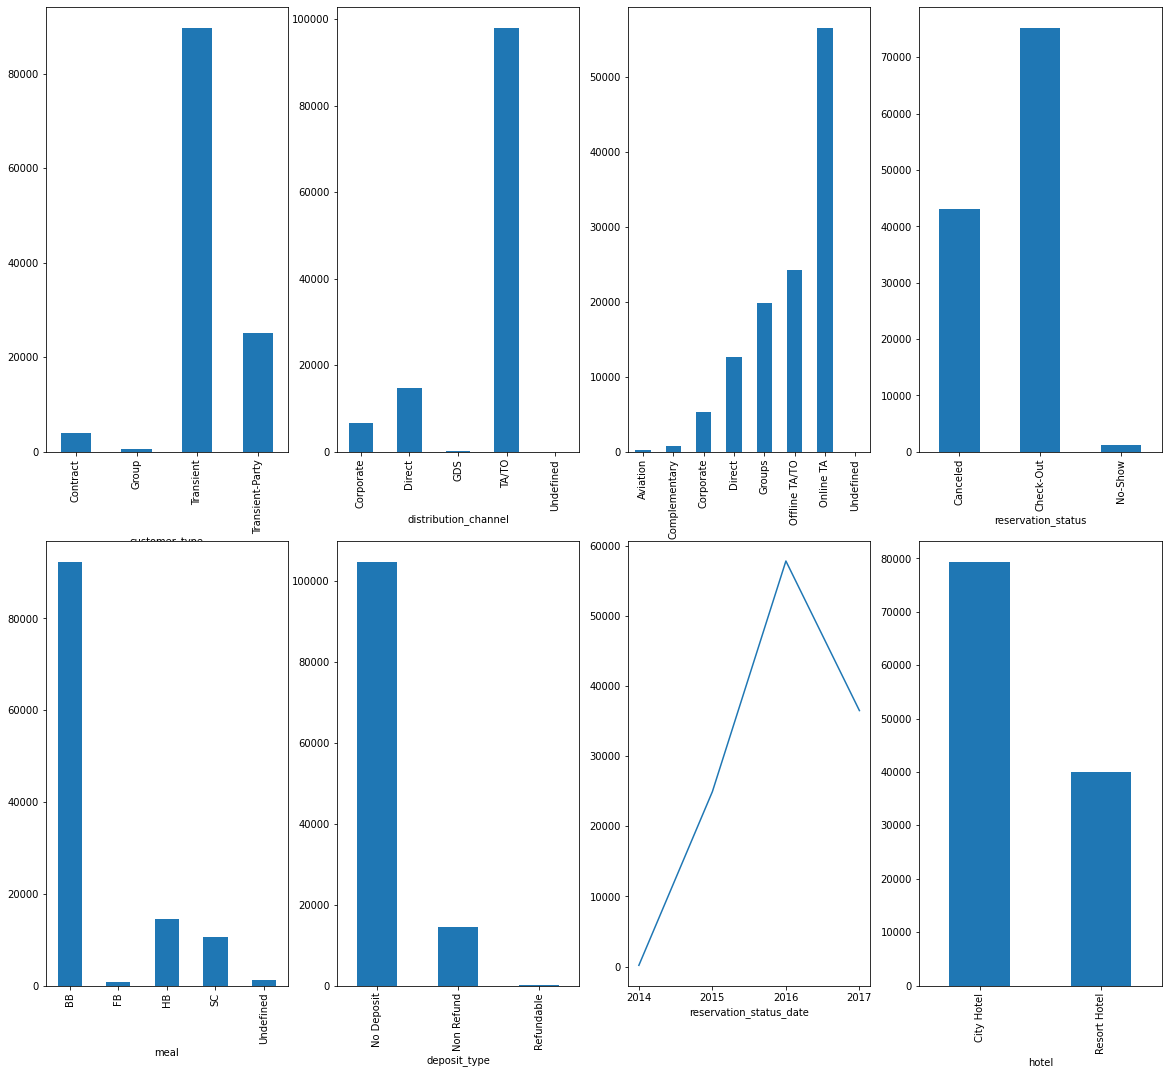

In [121]:
f, ax = plt.subplots(2,4, figsize=(20,18))

df.groupby('customer_type').size().plot.bar(ax=ax[0,0])

df.groupby('distribution_channel').size().plot.bar(ax=ax[0,1])

df.groupby('hotel').size().plot.bar(ax=ax[1,3])

df.groupby('reservation_status').size().plot.bar(ax=ax[0,3])

df.groupby('meal').size().plot.bar(ax=ax[1,0])

df.groupby('deposit_type').size().plot.bar(ax=ax[1,1])

year_group_by = df['reservation_status_date'].dt.year
df.groupby(year_group_by).size().plot(ax=ax[1,2])

ax[1,2].set_xticks(range(min(year_group_by), max(year_group_by) + 1, 1))

df.groupby('market_segment').size().plot.bar(ax=ax[0,2])


### Nhận biết các giá trị outlier
Việc nhận biết các giá trị outlier của một số yếu tố có thể giúp khách sạn lường trước được các các nhu cầu tăng đột biến và chuẩn bị các tài nguyên cần thiết để ứng phó
- Trong một booking, số trẻ em nhìn chung không nhiều outlier, nhưng số lượng người lớn **sẽ có lúc lên đến hơn từ 10 đến hơn 50 người**
- Dải dữ liệu về special request và car parking spaces ngắn và ít ảnh hưởng đến khách sạn nên có thể bỏ qua. 

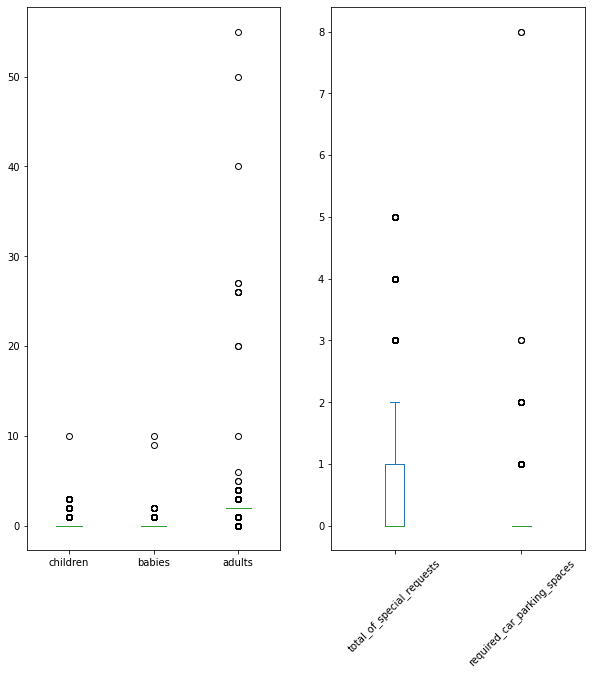

In [146]:
f, ax = plt.subplots(1,2, figsize=(10,10))


df[['children', 'babies', 'adults']].plot(kind='box', ax=ax[0])

df[['total_of_special_requests', 'required_car_parking_spaces']].plot(kind='box', ax=ax[1])

ax[1].tick_params(axis='x', labelrotation=45)

### Tổng hợp một số kết luận quan trọng
- Lượng booking tăng trưởng mạnh qua các năm, City hotel gấp đôi ở Resort hotel
- Khách sạn đang trong tình trạng quá tải điều đó được thể hiện ở:
    - Thời gian trung bình khách phải booking trước cao (103 ngày)
    - Thời gian khách đợi confirm cao (2 ngày)
    - % booking bị cancel cao (hơn 30%)
    - Xuất hiện nhiều outlier ở số lượng adults
- Về hành vi khách hàng :
    - Khách hàng chủ yếu chỉ dùng bữa sáng ở khách sạn
    - Thường không đặt cọc
    - Ít khi khách hàng liên hệ trực tiếp với khách sạn, chủ yếu qua các đại lý và tổ chức trung gian
    - Thời gian khách ở 3 - 4 ngày và khả năng cao sẽ có 1 ngày rơi vào thứ 7 hoặc chủ nhật
    - Thành phần khách thường sẽ có 1 - 2 người lớn
    - Số tiền chi tiêu mỗi đêm rơi vào khoảng 101$
- Một số kết luận khác:
    - Tỷ lệ khách hàng quay lại có tính liên quan đến số lượng booking không bị cancel của khách hàng trước đó
    - Mặc dù chủ yếu lượng khách đến từ bên trung gian, nhưng rất ít khi khách thuộc một hợp đồng hợp tác nào đó
